In [22]:
"""
ARES BO Prior Results - Final Publication Plot (FODO Style)
"""

from typing import Dict, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import torch
from matplotlib.colors import LogNorm, Normalize

import bo_cheetah_prior_ares as bo_cheetah_prior
import cheetah
from xopt import VOCS

# ============================================================================
# Plotting Styles (FODO)
# ============================================================================
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.style.use(["science", "ieee", "no-latex"])

# ============================================================================
# Load Data
# ============================================================================
print("Loading ARES optimization results...")
#df_nm_mismatched = pd.read_csv("data_ares/NM_mismatched.csv")
#df_bo_mismatched = pd.read_csv("data_ares/BO_mismatched.csv")
#df_bo_prior_mismatched = pd.read_csv("data_ares/BO_prior_mismatched.csv")
#df_bo_prior_matched = pd.read_csv("data_ares/BO_prior_matched.csv")
#df_bo_prior_matched_newtask = pd.read_csv("data_ares/BO_prior_matched_prior_newtasK.csv")


df_nm_mismatched = pd.read_csv("data/NM_mismatched_corrected.csv")
df_bo_mismatched = pd.read_csv("data/BO_mismatched_corrected.csv")
df_bo_prior_mismatched = pd.read_csv("data/BO_prior_mismatched_corrected.csv")
df_bo_prior_matched_newtask = pd.read_csv("data/BO_prior_matched_prior_newtask_corrected.csv")

print("Loading ARES optimization results...")
#df_nm_mismatched = pd.read_csv("data_ares_twostage/NM_mismatched.csv")
#df_bo_mismatched = pd.read_csv("data_ares_twostage/BO_mismatched.csv")
#df_bo_prior_mismatched = pd.read_csv("data_ares_twostage/BO_prior_twostage_mismatched.csv")
##df_bo_prior_matched = pd.read_csv("data/BO_prior_matched.csv")
#df_bo_prior_matched_newtask = pd.read_csv("data_ares_twostage/BO_prior_twostage_matched_prior_newtask.csv")


print(f"✓ Loaded {len(df_nm_mismatched)} NM evaluations")
print(f"✓ Loaded {len(df_bo_mismatched)} BO evaluations")
print(f"✓ Loaded {len(df_bo_prior_mismatched)} BO_prior (mismatched) evaluations")
print(f"✓ Loaded {len(df_bo_prior_matched_newtask)} BO_prior (matched) evaluations")


Loading ARES optimization results...
Loading ARES optimization results...
✓ Loaded 505 NM evaluations
✓ Loaded 505 BO evaluations
✓ Loaded 505 BO_prior (mismatched) evaluations
✓ Loaded 505 BO_prior (matched) evaluations


In [23]:
# ============================================================================
# Calculate Reference Values
# ============================================================================
# Use best result as "true minimum" reference
true_minimum = min([
    df_nm_mismatched['mae'].min(),
    df_bo_mismatched['mae'].min(),
    df_bo_prior_mismatched['mae'].min(),
    df_bo_prior_matched_newtask['mae'].min()
])

print(f"\nBest result found: {true_minimum:.6e}")


Best result found: 7.646679e-05



Generating final plot...


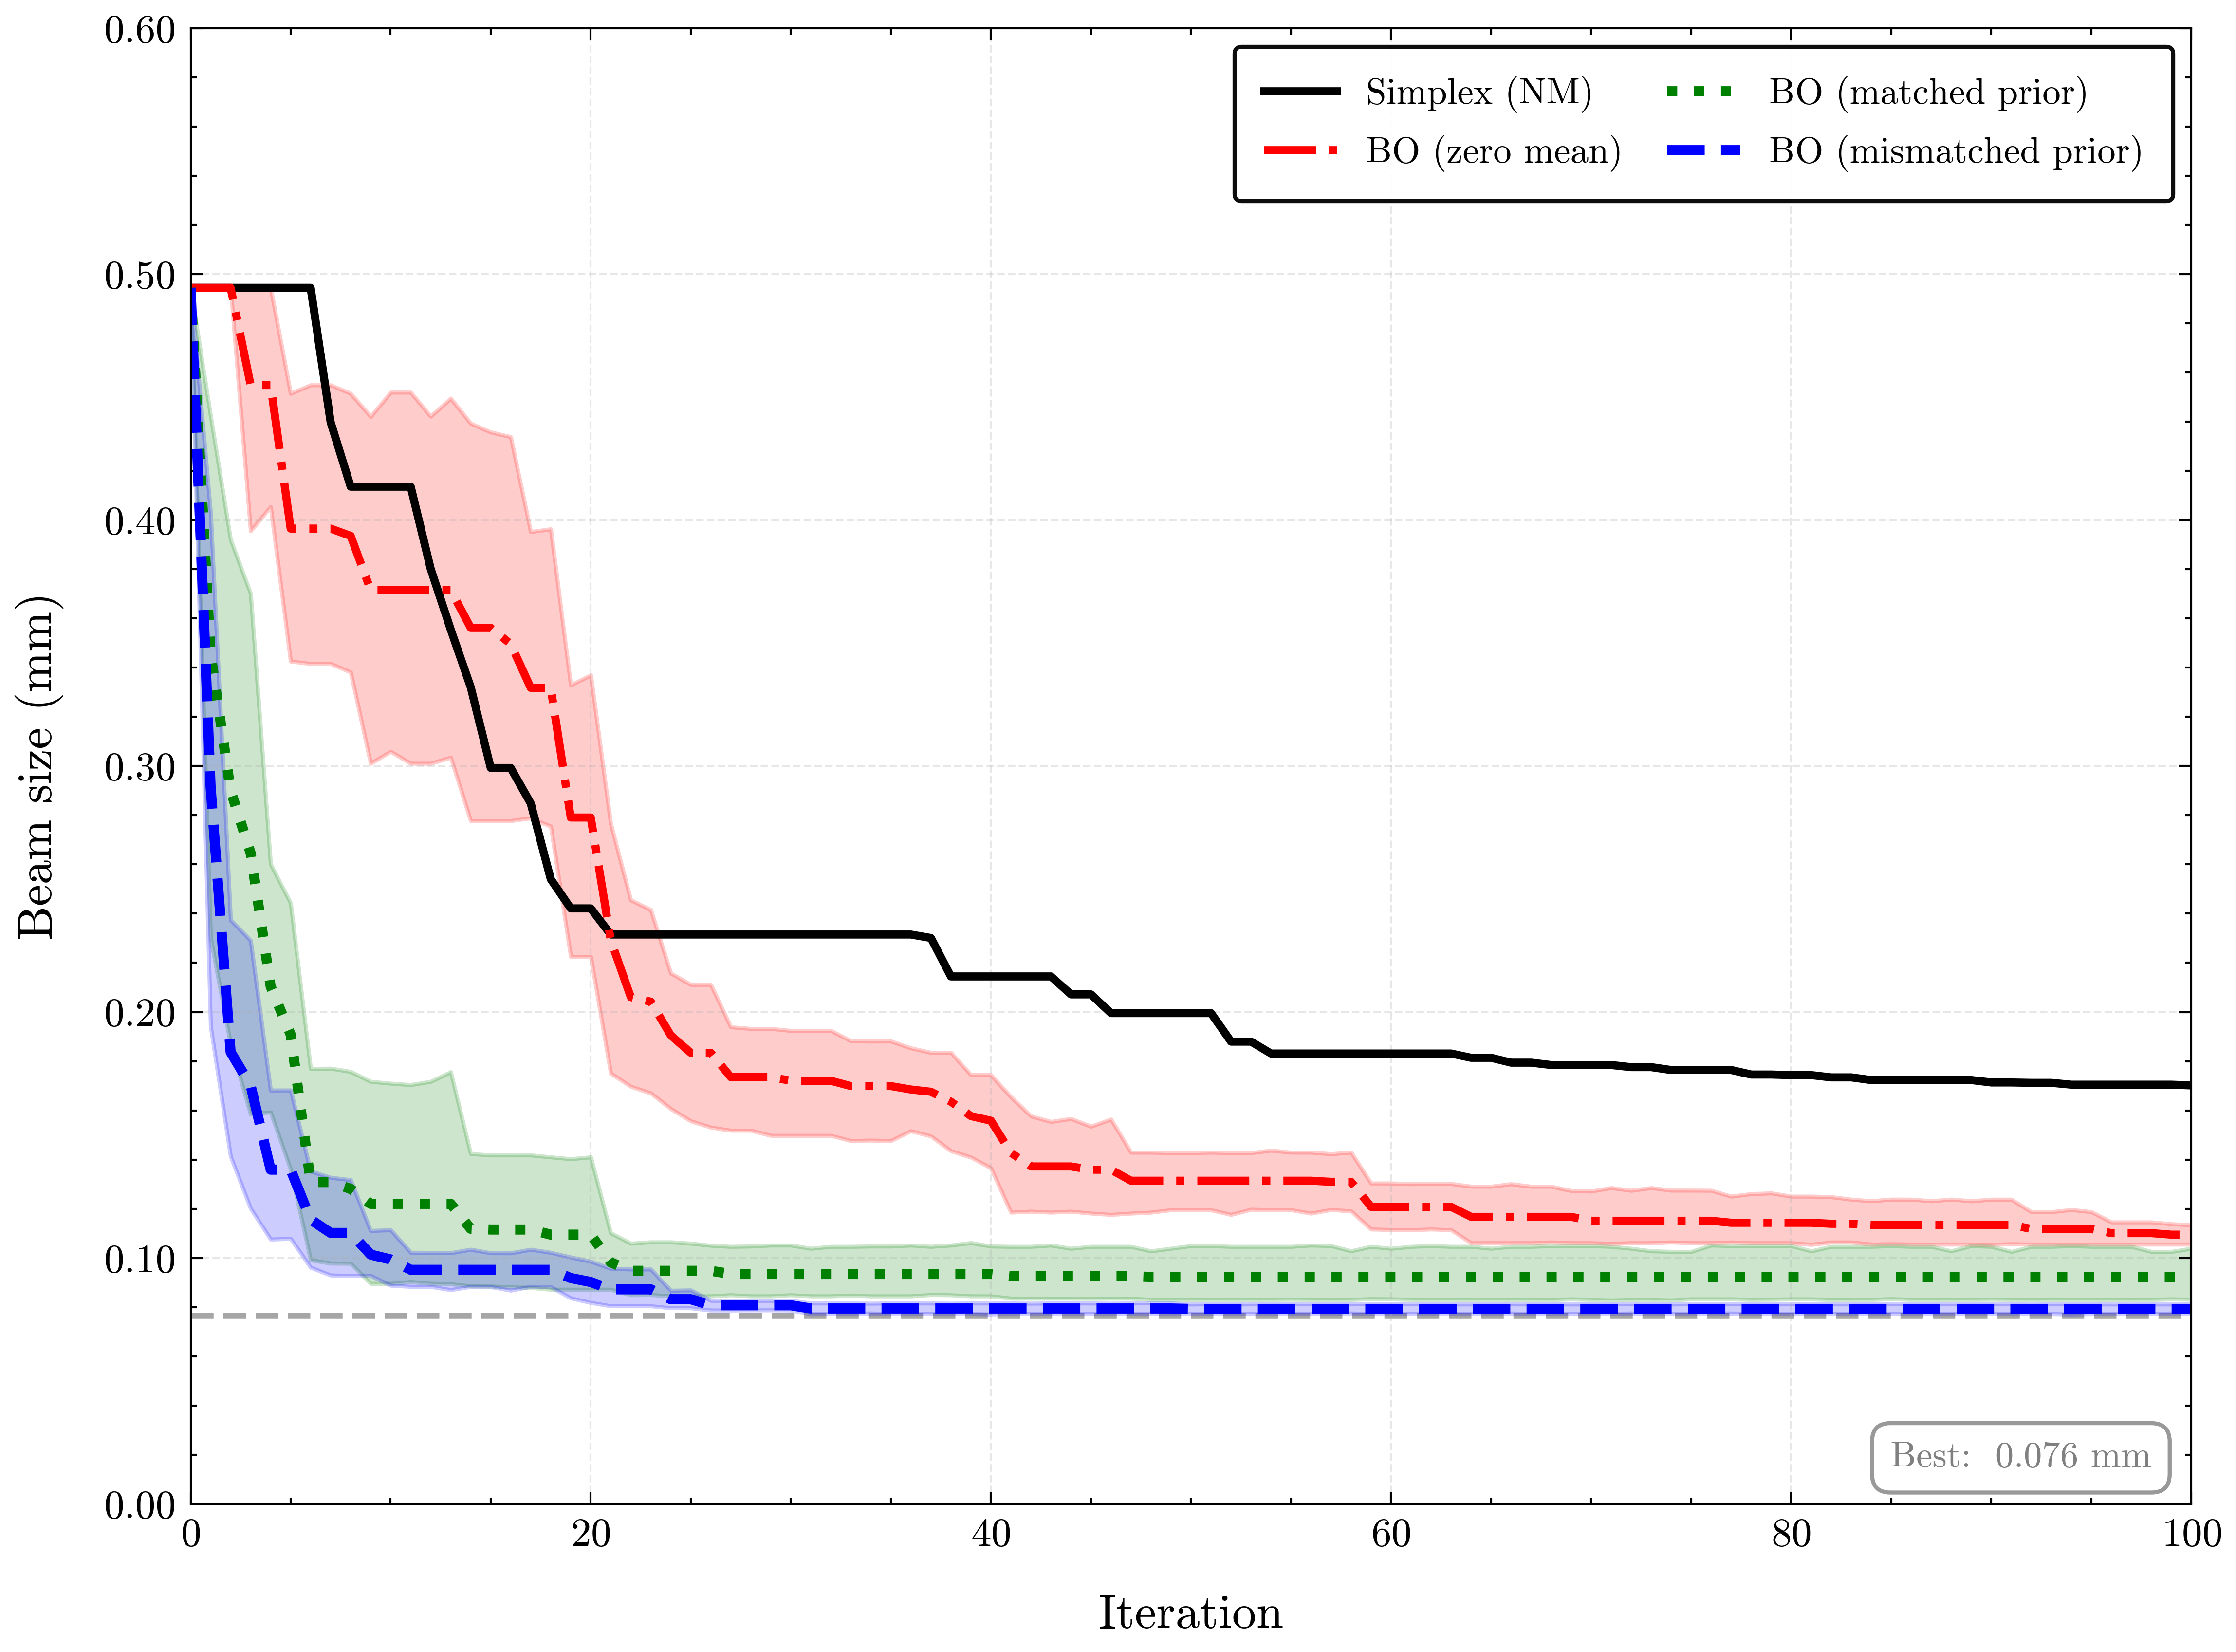

✓ Plot saved: ares_bo_prior_result.pdf


In [24]:
# ============================================================================
# Final Plot (FODO Style - Properly Sized)
# ============================================================================
print("\nGenerating final plot...")

# Create figure with generous size
fig, ax = plt.subplots(figsize=(8, 6))  # Larger figure for breathing room

# Reference line for best result
ax.axhline(y=true_minimum, color="grey", linestyle="--", 
           linewidth=1.5, alpha=0.7, zorder=1)

# Plot convergence curves
sns.lineplot(
    data=df_nm_mismatched,
    x="step",
    y="best_mae",
    ax=ax,
    label="Simplex (NM)",
    color=colors[0],
    ls="-",
    linewidth=2,
)

sns.lineplot(
    data=df_bo_mismatched,
    x="step",
    y="best_mae",
    ax=ax,
    label="BO (zero mean)",
    color=colors[1],
    ls="-.",
    linewidth=2,
)

sns.lineplot(
    data=df_bo_prior_matched_newtask,
    x="step",
    y="best_mae",
    ax=ax,
    label="BO (matched prior)",
    color=colors[3],
    ls=":",
    linewidth=2.5,
)

sns.lineplot(
    data=df_bo_prior_mismatched,
    x="step",
    y="best_mae",
    ax=ax,
    label="BO (mismatched prior)",
    color=colors[2],
    ls="--",
    linewidth=2.5,
)

# Add annotation for reference line (repositioned to avoid overlap)
ax.text(
    0.98,
    0.02,
    f"Best:  {true_minimum*1000:.3f} mm",
    transform=ax.transAxes,
    color="grey",
    ha="right",
    va="bottom",
    fontsize=9,
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='grey', alpha=0.8)
)

# Formatting with proper spacing
ax.set_ylabel("Beam size (mm)", fontsize=12, labelpad=10)  # Add padding
ax.set_xlabel("Iteration", fontsize=12, labelpad=10)
ax.set_xlim(0, df_bo_mismatched['step'].max())

# Convert y-axis to mm with cleaner formatting
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([f'{y*1000:.2f}' for y in yticks], fontsize=10)
ax.tick_params(axis='x', labelsize=10)

# Legend positioned to avoid data overlap
ax.legend(
    ncol=2, 
    loc='upper right', 
    framealpha=0.95, 
    fontsize=9,
    frameon=True,
    edgecolor='black',
    borderpad=0.8,
    labelspacing=0.6,
    columnspacing=1.2
)

ax.grid(True, alpha=0.3, linestyle='--')

# Use tight_layout with padding to prevent clipping
fig.tight_layout(pad=2.0)  # Extra padding around plot

# Save with bbox_inches='tight' to ensure nothing is cut off
fig.savefig("ares_bo_prior_result.pdf", bbox_inches="tight", dpi=300, pad_inches=0.2)
fig.savefig("ares_bo_prior_result.png", bbox_inches="tight", dpi=300, pad_inches=0.2)
plt.show()

print("✓ Plot saved: ares_bo_prior_result.pdf")

In [25]:
# ============================================================================
# Summary Table
# ============================================================================
print("\n" + "="*70)
print("  ARES OPTIMIZATION RESULTS")
print("="*70)

def get_final_stats(df):
    """Get mean ± std of final best values across runs"""
    final_best = df.groupby('run')['best_mae'].last()
    return final_best.mean(), final_best.std(), df['mae'].min()

methods = [
    ("Nelder-Mead", df_nm_mismatched),
    ("BO (zero mean)", df_bo_mismatched),
    ("BO_prior (mismatched)", df_bo_prior_mismatched),
    ("BO_prior (matched)", df_bo_prior_matched_newtask),
]

print(f"\n{'Method':<30s} {'Mean ± Std (mm)':<25s} {'Best (mm)':<15s}")
print("-"*70)

for name, df in methods:
    mean, std, best = get_final_stats(df)
    print(f"{name:<30s} {mean*1000:.3f} ± {std*1000:.3f}        {best*1000:.3f}")

print("="*70)


  ARES OPTIMIZATION RESULTS

Method                         Mean ± Std (mm)           Best (mm)      
----------------------------------------------------------------------
Nelder-Mead                    0.170 ± 0.000        0.170
BO (zero mean)                 0.109 ± 0.005        0.103
BO_prior (mismatched)          0.079 ± 0.003        0.076
BO_prior (matched)             0.092 ± 0.014        0.082


ANALYZING BO vs BO_PRIOR CONVERGENCE

1. CONVERGENCE COMPARISON
----------------------------------------------------------------------

Standard BO:
  Final best MAE:  0.0462 ± 0.0155 mm
  Improvement:     88.8%
  Steps to 90% best: 11.9 ± 6.0

BO with Prior:
  Final best MAE:  0.0756 ± 0.0077 mm
  Improvement:     81.7%
  Steps to 90% best: 1.9 ± 1.3

2. VARIANCE ANALYSIS
----------------------------------------------------------------------

Standard BO:
  Std dev (step 20):   0.0667 mm
  Std dev (step 100):  0.0155 mm
  Std dev (final):     0.0155 mm

BO with Prior:
  Std dev (step 20):   0.0139 mm
  Std dev (step 100):  0.0077 mm
  Std dev (final):     0.0077 mm

3. GENERATING DIAGNOSTIC PLOTS
----------------------------------------------------------------------
✓ Saved bo_prior_diagnostics.png

DIAGNOSIS COMPLETE


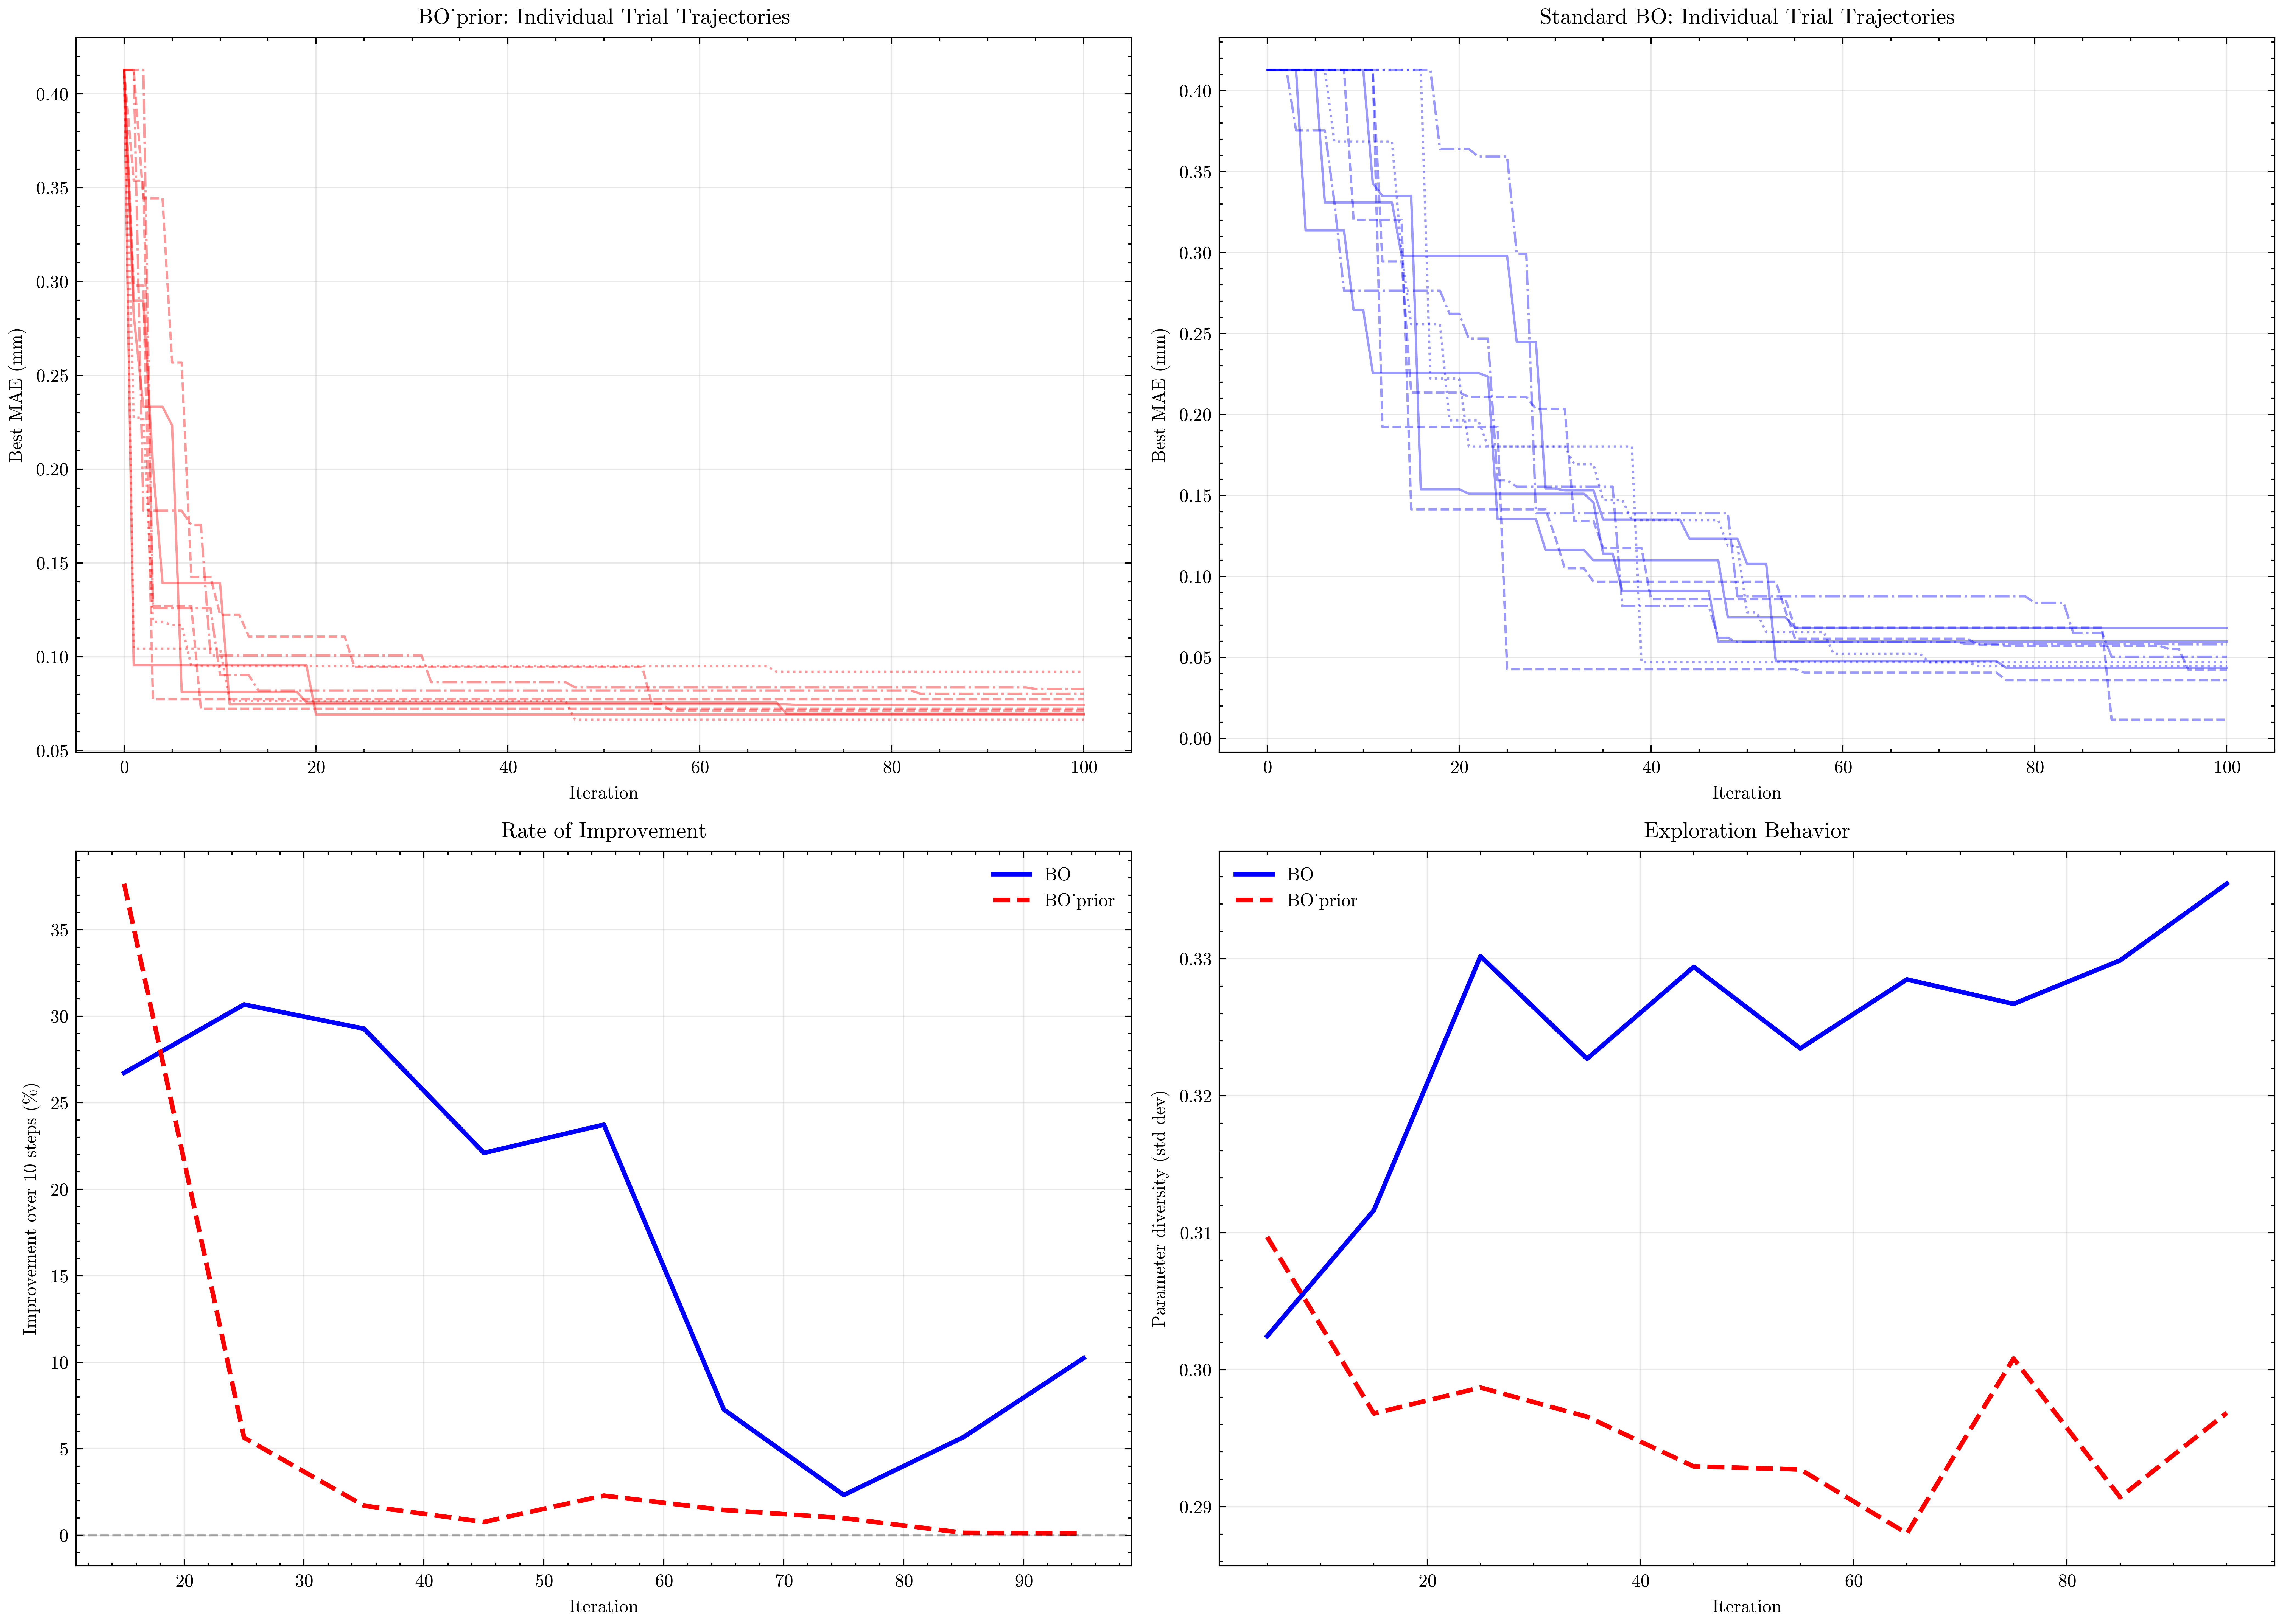

In [26]:
"""
Check GP hyperparameter evolution and potential optimization issues
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("="*70)
print("ANALYZING BO vs BO_PRIOR CONVERGENCE")
print("="*70)

# Load data
df_bo = pd.read_csv("data_ares/BO_mismatched.csv")
df_bo_prior = pd.read_csv("data_ares/BO_prior_mismatched.csv")

# Compare convergence statistics
print("\n1. CONVERGENCE COMPARISON")
print("-" * 70)

for name, df in [("Standard BO", df_bo), ("BO with Prior", df_bo_prior)]:
    print(f"\n{name}:")
    
    # Final performance across trials
    final_values = df.groupby('run')['best_mae'].last()
    print(f"  Final best MAE:  {final_values.mean()*1000:.4f} ± {final_values.std()*1000:.4f} mm")
    
    # Improvement from start
    initial_values = df.groupby('run')['mae'].first()
    improvement = (initial_values.mean() - final_values.mean()) / initial_values.mean() * 100
    print(f"  Improvement:     {improvement:.1f}%")
    
    # Number of evaluations to reach 90% of best
    best_overall = df['best_mae'].min()
    threshold = best_overall + 0.1 * (df['mae'].max() - best_overall)
    
    steps_to_threshold = []
    for run in df['run'].unique():
        run_data = df[df['run'] == run]
        steps = run_data[run_data['best_mae'] <= threshold]['step']
        if len(steps) > 0:
            steps_to_threshold.append(steps.iloc[0])
    
    if steps_to_threshold:
        print(f"  Steps to 90% best: {np.mean(steps_to_threshold):.1f} ± {np.std(steps_to_threshold):.1f}")

# Check variance in performance
print("\n2. VARIANCE ANALYSIS")
print("-" * 70)

for name, df in [("Standard BO", df_bo), ("BO with Prior", df_bo_prior)]:
    # Variance across trials at different stages
    early = df[df['step'] <= 20].groupby('run')['best_mae'].last().std()
    mid = df[df['step'] <= 100].groupby('run')['best_mae'].last().std()
    late = df.groupby('run')['best_mae'].last().std()
    
    print(f"\n{name}:")
    print(f"  Std dev (step 20):   {early*1000:.4f} mm")
    print(f"  Std dev (step 100):  {mid*1000:.4f} mm")  
    print(f"  Std dev (final):     {late*1000:.4f} mm")

# Visualize the problem
print("\n3. GENERATING DIAGNOSTIC PLOTS")
print("-" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Individual trial trajectories
ax = axes[0, 0]
for run in df_bo_prior['run'].unique():
    run_data = df_bo_prior[df_bo_prior['run'] == run]
    ax.plot(run_data['step'], run_data['best_mae']*1000, alpha=0.4, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel('Best MAE (mm)')
ax.set_title('BO_prior: Individual Trial Trajectories')
ax.grid(True, alpha=0.3)

# Plot 2: Standard BO individual trials
ax = axes[0, 1]
for run in df_bo['run'].unique():
    run_data = df_bo[df_bo['run'] == run]
    ax.plot(run_data['step'], run_data['best_mae']*1000, alpha=0.4, color='blue')
ax.set_xlabel('Iteration')
ax.set_ylabel('Best MAE (mm)')
ax.set_title('Standard BO: Individual Trial Trajectories')
ax.grid(True, alpha=0.3)

# Plot 3: Improvement rate
ax = axes[1, 0]
window = 10
for name, df, color in [("BO", df_bo, 'blue'), ("BO_prior", df_bo_prior, 'red')]:
    improvements = []
    steps = []
    for run in df['run'].unique():
        run_data = df[df['run'] == run].sort_values('step')
        for i in range(window, len(run_data)):
            old_best = run_data.iloc[i-window]['best_mae']
            new_best = run_data.iloc[i]['best_mae']
            improvement = (old_best - new_best) / old_best * 100
            improvements.append(improvement)
            steps.append(run_data.iloc[i]['step'])
    
    # Bin and average
    bins = np.arange(0, max(steps)+window, window)
    binned_improvements = []
    binned_steps = []
    for i in range(len(bins)-1):
        mask = (np.array(steps) >= bins[i]) & (np.array(steps) < bins[i+1])
        if mask.sum() > 0:
            binned_improvements.append(np.mean(np.array(improvements)[mask]))
            binned_steps.append((bins[i] + bins[i+1]) / 2)
    
    ax.plot(binned_steps, binned_improvements, label=name, color=color, linewidth=2)

ax.set_xlabel('Iteration')
ax.set_ylabel(f'Improvement over {window} steps (%)')
ax.set_title('Rate of Improvement')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Plot 4: Exploration vs exploitation
ax = axes[1, 1]
for name, df, color in [("BO", df_bo, 'blue'), ("BO_prior", df_bo_prior, 'red')]:
    # Calculate diversity of sampled points (std dev of parameters)
    diversity = []
    steps = []
    window_size = 10
    
    param_cols = ['q1', 'q2', 'cv', 'q3', 'ch']
    for run in df['run'].unique():
        run_data = df[df['run'] == run].sort_values('step')
        for i in range(window_size, len(run_data), window_size):
            window_data = run_data.iloc[i-window_size:i]
            # Normalize parameters to [0,1] for fair comparison
            param_std = []
            for col in param_cols:
                if col in window_data.columns:
                    normalized = (window_data[col] - window_data[col].min()) / (window_data[col].max() - window_data[col].min() + 1e-10)
                    param_std.append(normalized.std())
            
            diversity.append(np.mean(param_std))
            steps.append(window_data['step'].mean())
    
    # Bin and average
    bins = np.arange(0, max(steps)+window_size, window_size)
    binned_diversity = []
    binned_steps = []
    for i in range(len(bins)-1):
        mask = (np.array(steps) >= bins[i]) & (np.array(steps) < bins[i+1])
        if mask.sum() > 0:
            binned_diversity.append(np.mean(np.array(diversity)[mask]))
            binned_steps.append((bins[i] + bins[i+1]) / 2)
    
    ax.plot(binned_steps, binned_diversity, label=name, color=color, linewidth=2)

ax.set_xlabel('Iteration')
ax.set_ylabel('Parameter diversity (std dev)')
ax.set_title('Exploration Behavior')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bo_prior_diagnostics.png', dpi=150, bbox_inches='tight')
print("✓ Saved bo_prior_diagnostics.png")

print("\n" + "="*70)
print("DIAGNOSIS COMPLETE")
print("="*70)

Generating misalignment learning plots for: data/BO_prior_mismatched_corrected.csv


C:\Users\HibaSikander\AppData\Local\Temp\ipykernel_27476\2237994428.py:131: UserWarning: Glyph 956 (\N{GREEK SMALL LETTER MU}) missing from font(s) cmr10.
  plt.tight_layout()
C:\Users\HibaSikander\AppData\Local\Temp\ipykernel_27476\2237994428.py:134: UserWarning: Glyph 956 (\N{GREEK SMALL LETTER MU}) missing from font(s) cmr10.
  plt.savefig(output_file, dpi=300, bbox_inches='tight')


✓ Saved to misalignment_evolution.png


C:\Users\HibaSikander\AppData\Local\Temp\ipykernel_27476\2237994428.py:223: UserWarning: Glyph 956 (\N{GREEK SMALL LETTER MU}) missing from font(s) cmr10.
  plt.tight_layout()
C:\Users\HibaSikander\AppData\Local\Temp\ipykernel_27476\2237994428.py:226: UserWarning: Glyph 956 (\N{GREEK SMALL LETTER MU}) missing from font(s) cmr10.
  plt.savefig(output_file, dpi=300, bbox_inches='tight')


✓ Saved to misalignment_heatmap.png
✓ Done!


C:\Users\HibaSikander\Desktop\RP_inProcess\cheetah-demos\chAresEnv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 956 (\N{GREEK SMALL LETTER MU}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


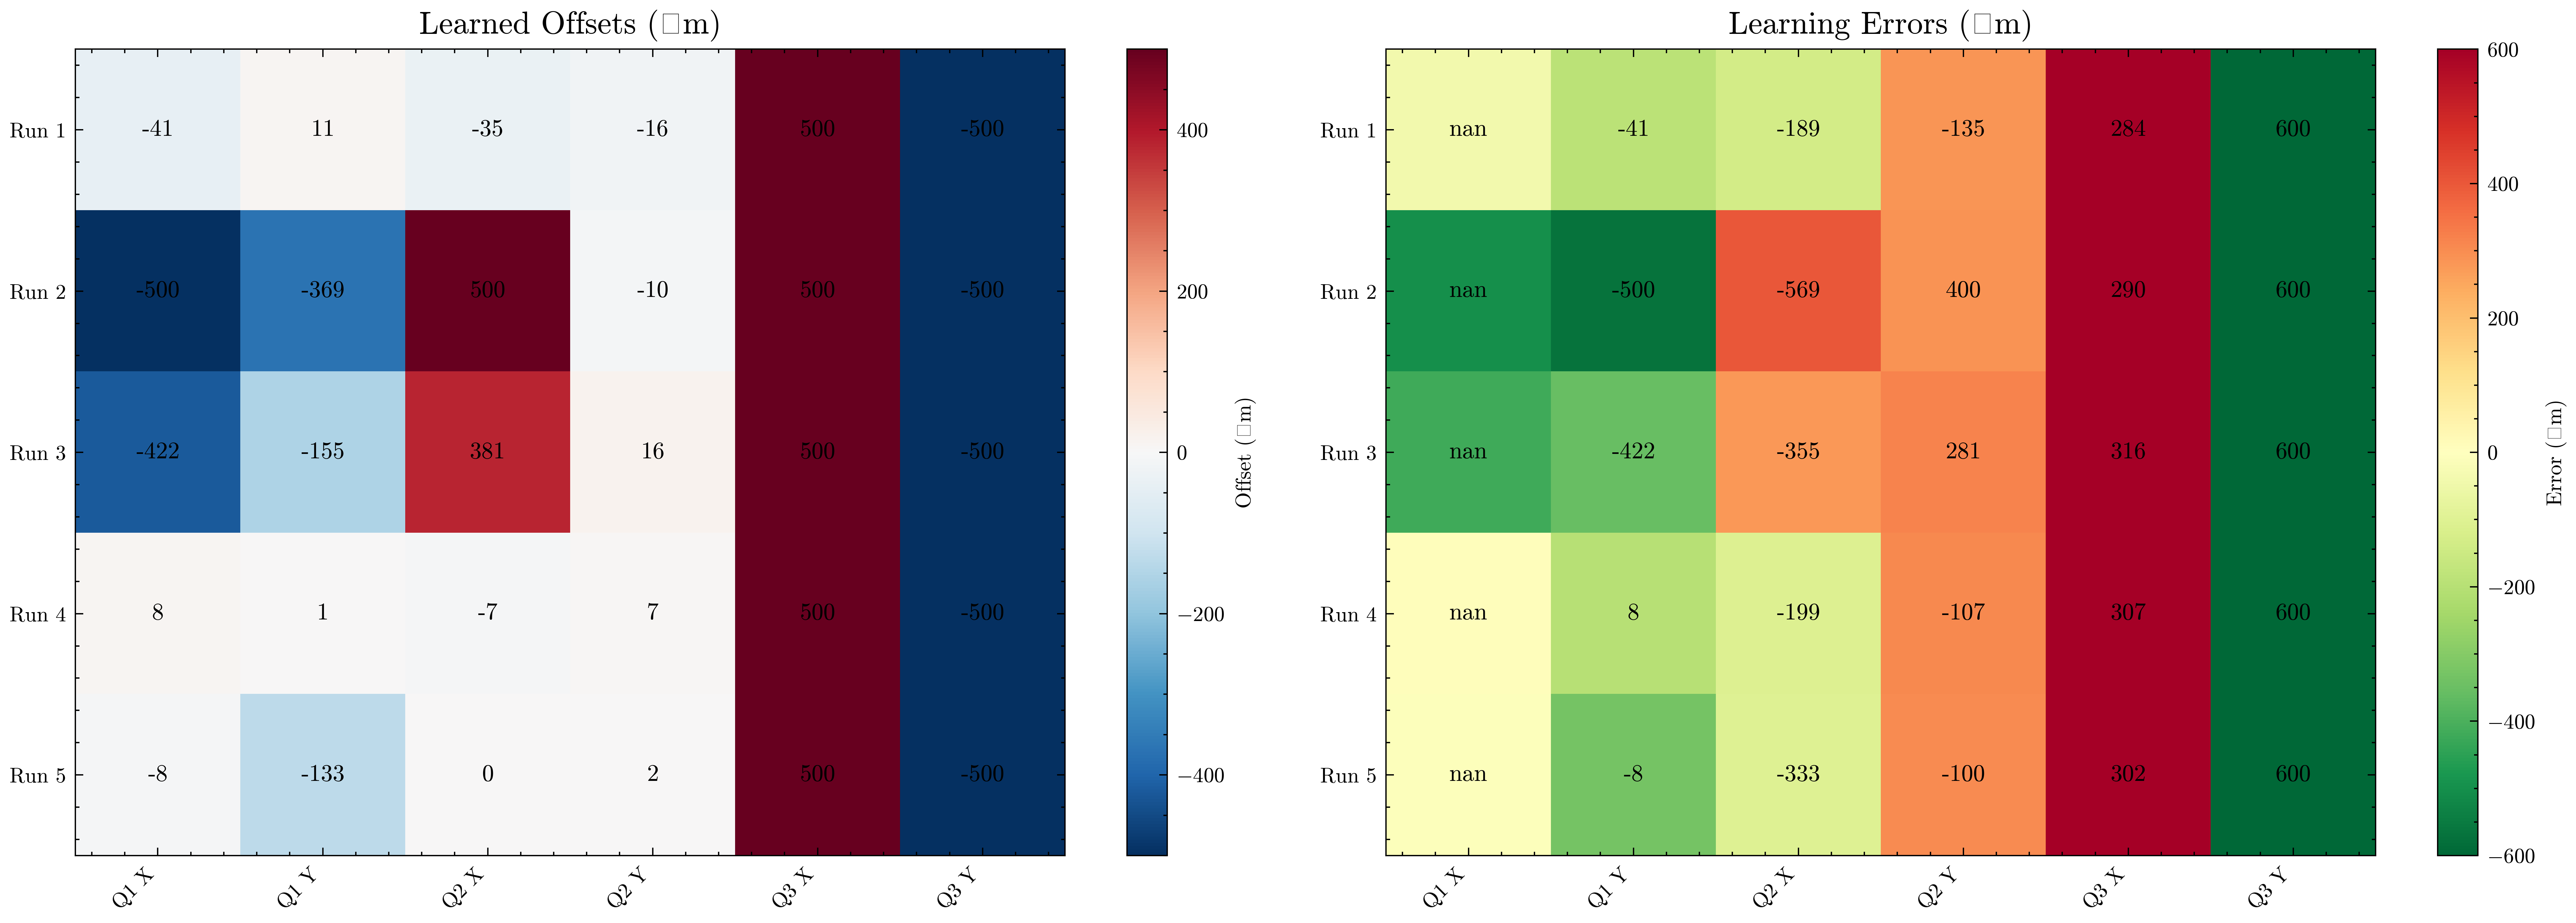

In [31]:
"""
Plot Misalignment Learning Evolution

Visualizes how the learned offsets evolve during BO optimization.
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

plt.style.use(['science', 'ieee', 'no-latex'])


def plot_misalignment_learning(csv_file: str, output_file: str = None):
    """
    Plot the evolution of learned misalignment offsets during optimization.
    
    Args:
        csv_file: Path to CSV file with optimization results
        output_file: Path to save plot (if None, displays instead)
    """
    # Load data
    df = pd.read_csv(csv_file)
    
    # Ground truth values
    ground_truth = {
        'q1_offset_x': 0.000000,
        'q1_offset_y': 0.000200,
        'q2_offset_x': 0.000100,
        'q2_offset_y': -0.000300,
        'q3_offset_x': -0.000100,
        'q3_offset_y': 0.000150,
    }
    
    # Check if learned offsets are in the data
    offset_cols = [f'learned_{key}' for key in ground_truth.keys()]
    if not all(col in df.columns for col in offset_cols):
        print(f"❌ Error: CSV file must contain learned offset columns:   {offset_cols}")
        print(f"Available columns: {list(df.columns)}")
        return
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Misalignment Learning Evolution', fontsize=16, y=0.995)
    
    # Get unique runs
    runs = df['run'].unique()
    n_runs = len(runs)
    
    colors = plt.cm.tab10(np.linspace(0, 1, n_runs))
    
    # Plot settings
    quads = ['q1', 'q2', 'q3']
    directions = ['offset_x', 'offset_y']
    
    # Plot each quadrupole's offsets
    for i, quad in enumerate(quads):
        for j, direction in enumerate(directions):
            ax = axes[i, j]
            param_name = f'{quad}_{direction}'
            learned_col = f'learned_{param_name}'
            gt_value = ground_truth[param_name]
            
            # Plot each run
            for run_idx, run in enumerate(runs):
                run_data = df[df['run'] == run].copy()
                run_data = run_data.sort_values('step')
                
                # Convert to micrometers for readability
                values_um = run_data[learned_col].values * 1e6
                steps = run_data['step'].values
                
                ax.plot(steps, values_um, 
                       label=f'Run {int(run)+1}' if j == 0 else '',
                       color=colors[run_idx], 
                       alpha=0.7,
                       linewidth=1.5)
            
            # Ground truth line
            ax.axhline(y=gt_value*1e6, color='red', linestyle='--', 
                      linewidth=2, label='Ground Truth', zorder=10)
            
            # Constraint boundaries (for ±500μm constraint)
            ax.axhline(y=500, color='gray', linestyle=':', linewidth=1, alpha=0.5)
            ax.axhline(y=-500, color='gray', linestyle=':', linewidth=1, alpha=0.5)
            
            # Get max step safely
            max_step = steps.max() if len(steps) > 0 else 100
            
            ax.fill_between([0, max_step], 500, 1500, alpha=0.1, color='orange', label='Extended Range')
            ax.fill_between([0, max_step], -500, -1500, alpha=0.1, color='orange')
            
            # Labels
            ax.set_xlabel('Iteration', fontsize=10)
            ax.set_ylabel(f'{param_name} (μm)', fontsize=10)
            ax.set_title(f'{quad.upper()} {direction.split("_")[1].upper()}', fontsize=11)
            ax.grid(True, alpha=0.3)
            
            if i == 0 and j == 0:
                ax.legend(loc='best', fontsize=8, ncol=2)
    
    # Third column:  Distance from ground truth
    for i, quad in enumerate(quads):
        ax = axes[i, 2]
        
        for run_idx, run in enumerate(runs):
            run_data = df[df['run'] == run].copy()
            run_data = run_data.sort_values('step')
            
            # Calculate Euclidean distance from ground truth
            x_learned = run_data[f'learned_{quad}_offset_x'].values
            y_learned = run_data[f'learned_{quad}_offset_y'].values
            x_gt = ground_truth[f'{quad}_offset_x']
            y_gt = ground_truth[f'{quad}_offset_y']
            
            distance_um = np.sqrt((x_learned - x_gt)**2 + (y_learned - y_gt)**2) * 1e6
            steps = run_data['step'].values
            
            ax.plot(steps, distance_um, 
                   color=colors[run_idx], 
                   alpha=0.7,
                   linewidth=1.5)
        
        ax.set_xlabel('Iteration', fontsize=10)
        ax.set_ylabel('Error (μm)', fontsize=10)
        ax.set_title(f'{quad.upper()} Total Error', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.set_yscale('log')  # Log scale for error
    
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"✓ Saved to {output_file}")
    else:
        plt.show()


def plot_offset_heatmap(csv_file: str, output_file: str = None):
    """
    Create a heatmap showing final learned offsets vs ground truth.
    
    Args:
        csv_file: Path to CSV file with optimization results
        output_file: Path to save plot (if None, displays instead)
    """
    df = pd.read_csv(csv_file)
    
    ground_truth = {
        'Q1 X': 0.0,
        'Q1 Y': 200.0,
        'Q2 X': 100.0,
        'Q2 Y':   -300.0,
        'Q3 X': -100.0,
        'Q3 Y':  150.0,
    }
    
    # Get final learned values (last step of each run)
    runs = df['run'].unique()
    learned_values = {}
    
    for run in runs:
        run_data = df[df['run'] == run]
        final_step = run_data[run_data['step'] == run_data['step'].max()]
        
        learned_values[f'Run {int(run)+1}'] = {
            'Q1 X':   final_step['learned_q1_offset_x'].values[0] * 1e6,
            'Q1 Y':  final_step['learned_q1_offset_y'].values[0] * 1e6,
            'Q2 X':  final_step['learned_q2_offset_x'].values[0] * 1e6,
            'Q2 Y': final_step['learned_q2_offset_y'].values[0] * 1e6,
            'Q3 X': final_step['learned_q3_offset_x'].values[0] * 1e6,
            'Q3 Y': final_step['learned_q3_offset_y'].values[0] * 1e6,
        }
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(learned_values).T
    comparison_df['Ground Truth'] = pd.Series(ground_truth)
    
    # Calculate errors
    for col in ground_truth.keys():
        comparison_df[f'{col} Error'] = comparison_df[col] - ground_truth[col]
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Heatmap 1: Learned values
    im1 = ax1.imshow(comparison_df[list(ground_truth.keys())].values, 
                     cmap='RdBu_r', aspect='auto', vmin=-500, vmax=500)
    ax1.set_xticks(range(len(ground_truth)))
    ax1.set_xticklabels(ground_truth.keys(), rotation=45, ha='right')
    ax1.set_yticks(range(len(comparison_df)))
    ax1.set_yticklabels(comparison_df.index)
    ax1.set_title('Learned Offsets (μm)', fontsize=12)
    
    # Add text annotations
    for i in range(len(comparison_df)):
        for j in range(len(ground_truth)):
            text = ax1.text(j, i, f'{comparison_df.iloc[i, j]:.0f}',
                          ha="center", va="center", color="black", fontsize=9)
    
    plt.colorbar(im1, ax=ax1, label='Offset (μm)')
    
    # Heatmap 2: Errors
    error_cols = [f'{col} Error' for col in ground_truth.keys()]
    im2 = ax2.imshow(comparison_df[error_cols].values, 
                     cmap='RdYlGn_r', aspect='auto', vmin=-600, vmax=600)
    ax2.set_xticks(range(len(ground_truth)))
    ax2.set_xticklabels(ground_truth.keys(), rotation=45, ha='right')
    ax2.set_yticks(range(len(comparison_df)))
    ax2.set_yticklabels(comparison_df.index)
    ax2.set_title('Learning Errors (μm)', fontsize=12)
    
    # Add text annotations
    for i in range(len(comparison_df)):
        for j in range(len(ground_truth)):
            error_val = comparison_df.iloc[i, j+len(ground_truth)]
            text = ax2.text(j, i, f'{error_val:.0f}',
                          ha="center", va="center", color="black", fontsize=9)
    
    plt.colorbar(im2, ax=ax2, label='Error (μm)')
    
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"✓ Saved to {output_file}")
    else:
        plt.show()


# ============================================================================
# 🎯 FOR JUPYTER NOTEBOOK:  Direct execution
# ============================================================================

# Specify your CSV file path here
csv_file_path = "data/BO_prior_mismatched_corrected.csv"

print(f"Generating misalignment learning plots for: {csv_file_path}")

# Generate evolution plot
plot_misalignment_learning(csv_file_path, "misalignment_evolution.png")

# Generate heatmap
plot_offset_heatmap(csv_file_path, "misalignment_heatmap.png")

print("✓ Done!")